In [20]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w

# Acquire

* Data has been acquired from Kaggle at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
* The data set contained 319,795 observations and 18 features before cleaning
* Each observation represents one person in the study
* Each feature represents an aspect of each person's health
* Data set is imbalanced under 9% of respondants report  having had coronary heart disease or myocardial infarction

In [2]:
train, validate, test = w.get_my_data()

# Prepare

* There were no null values in this data set
* Features were renamed for convention and readability
* Dummy variables were created for catagorical features for use in modeling
* Data was split into train, validate, and test dataframes stratifying on heart disease ~(64/16/20)
* Scaled versions of numeric variables were added to the dataframe for use in modeling

In [6]:
num_cols = ['bmi',
            'poor_physical_health_days',
            'poor_mental_health_days',
            'sleep_hours']


cat_cols = ['heart_disease',
            'smoker',
            'heavy_drinker',
            'difficulty_walking',
            'diabetic',
            'physical_activity',
            'kidney_disease',
            'skin_cancer',
            'age_category',
            'general_health',
            'stroke',
            'sex',
            'race',
            'asthma']

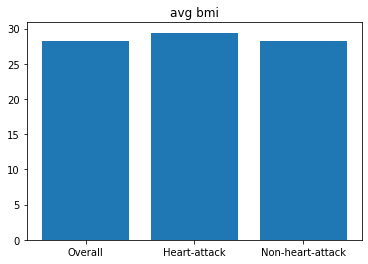

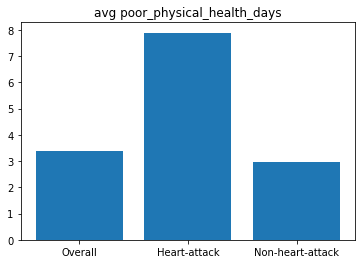

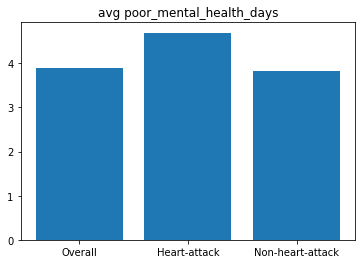

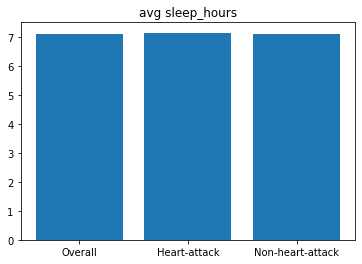

In [18]:
for col in num_cols:
    
    over = train[col].mean()
    heart = train[col][train.heart_disease == 'Yes'].mean()
    health = train[col][train.heart_disease == 'No'].mean()
    
    x = ['Overall', 'Heart-attack', 'Non-heart-attack']
    hight = [over, heart, health]
    
    plt.bar(x, hight)
    plt.title(f'avg {col}')
    plt.show()

In [25]:
for col in cat_cols:
    
     cats = list(set(train[col].to_list()))
    
    
    for val in vals
    
        num = len(train[train[col] = val])
        
        v
        
    
    print(vals)

['Yes', 'No']
['Yes', 'No']
['Yes', 'No']
['Yes', 'No']
['Yes (during pregnancy)', 'Yes', 'No', 'No, borderline diabetes']
['Yes', 'No']
['Yes', 'No']
['Yes', 'No']
['18-24', '70-74', '30-34', '50-54', '55-59', '80 or older', '40-44', '35-39', '25-29', '65-69', '45-49', '60-64', '75-79']
['Very good', 'Good', 'Fair', 'Poor', 'Excellent']
['Yes', 'No']
['Female', 'Male']
['Asian', 'White', 'American Indian/Alaskan Native', 'Hispanic', 'Black', 'Other']
['Yes', 'No']


In [ ]:
for col in cat_cols:
    
    sns.barplot(x=, y='values', data=train)

    plt.title(f'Title about {col}')
    plt.show()

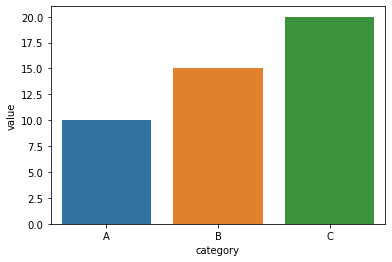

In [21]:
# Sample DataFrame
data = {'category': ['A', 'B', 'C'], 'value': [10, 15, 20]}
df = pd.DataFrame(data)

# Create the barplot
sns.barplot(x='category', y='value', data=df)
plt.show()

In [22]:
df

,category,value
0,A,10
1,B,15
2,C,20


In [4]:
df = df.rename(columns={'HeartDisease':'heart_disease', 
                        'BMI':'bmi', 
                        'Smoking':'smoker', 
                        'AlcoholDrinking':'heavy_drinker',
                        'Stroke':'stroke',
                        'PhysicalHealth':'poor_physical_health_days', 
                        'MentalHealth':'poor_mental_health_days', 
                        'DiffWalking': 'difficulty_walking', 
                        'Sex':'sex', 
                        'AgeCategory':'age_category',
                        'Race':'race', 
                        'Diabetic':'diabetic', 
                        'PhysicalActivity':'physical_activity', 
                        'GenHealth':'general_health', 
                        'SleepTime':'sleep_hours',
                        'Asthma':'asthma', 
                        'KidneyDisease':'kidney_disease', 
                        'SkinCancer':'skin_cancer'})

NameError: name 'df' is not defined

In [ ]:


dummies = pd.get_dummies(df[cat_cols])

df = df.join(dummies)

In [ ]:
def split_my_data(df):
    '''Splits data and returns a train, validate, and test dataframe'''

    # split df into train_validate and test
    train_validate, test = train_test_split(df, 
                                            test_size=.2, 
                                            random_state=123, 
                                            stratify=df.heart_disease)

    # split train_validate into train and validate
    train, validate =  train_test_split(train_validate, 
                                        test_size=.2, 
                                        random_state=123, 
                                        stratify=train_validate.heart_disease)

    # reset index for train validate and test
    train.reset_index(drop=True, inplace=True)
    validate.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)

    return train, validate, test

In [ ]:
train, validate, test = split_my_data(df)

In [ ]:
def scale_data(train, validate, test):
    "Adds scaled columns to split data"

    # Scaling continuous variables
    cols_to_scale = ['bmi',
                     'sleep_hours',
                     'poor_physical_health_days',
                     'poor_mental_health_days']

    # create df's for train validate and test with only columns that need to be scaled
    train_to_be_scaled = train[cols_to_scale]
    validate_to_be_scaled = validate[cols_to_scale]
    test_to_be_scaled = test[cols_to_scale]

    # create scaler object and fit that object on the train data
    scaler = RobustScaler().fit(train_to_be_scaled)

    # transform data into an array using the scaler object 
    train_scaled = scaler.transform(train_to_be_scaled)
    validate_scaled = scaler.transform(validate_to_be_scaled)
    test_scaled = scaler.transform(test_to_be_scaled)

    # transform data into a dataframe
    train_scaled = pd.DataFrame(train_scaled, columns = cols_to_scale)
    validate_scaled = pd.DataFrame(validate_scaled, columns = cols_to_scale)
    test_scaled = pd.DataFrame(test_scaled, columns = cols_to_scale)

    # add _scaled to each column name in the scaled data
    for col in cols_to_scale:

        train_scaled = train_scaled.rename(columns={col: col + "_scaled"})
        validate_scaled = validate_scaled.rename(columns={col: col + "_scaled"})
        test_scaled = test_scaled.rename(columns={col: col + "_scaled"})

    # add scaled columns to their original dataframes
    train = train.join(train_scaled)
    validate = validate.join(validate_scaled)
    test = test.join(test_scaled)

    return train, validate, test

In [ ]:
train, validate, test = scale_data(train, validate, test)

In [ ]:
train

In [ ]:
validate

In [ ]:
test

In [ ]:
len(train)/len(df)

In [ ]:
len(validate)/len(df)

In [ ]:
len(test)/len(df)